In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("../dataset/dup_cleaned_covid.csv")
df.head()

,tweets
0,belum ada bukti gambar yang diklaim pembekuan darah setelah vaksinasi covid
1,keliru klaim vaksin covid berbasis mrna dan adenoviral menurunkan sistem kekebalan tubuh
2,kemenkes minta penonton konser coldplay booster vaksin covid
3,jadwal dan lokasi vaksin covid surabaya hari ini mei
4,jadwal dan lokasi vaksin covid surabaya hari ini mei


# Remove “ and ” (not double quote) "

In [3]:
filtered_df = df[df['tweets'].str.contains('“')]

In [4]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 75 to 36622
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  133 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


In [5]:
filtered_df.head()

,tweets
75,“saya secara umum merasa baikbaik saja tetapi dokter saya menyarankan untuk mengisolasi diri sampai tidak menunjukkan gejala” kata lee
256,hampir terlepas dari pandemi covid setelah beberapa tahun lalu peraturan pemerintah tentang larangan penyelenggaraan acara pergantian tahun akhirnya terlahirlah inovasi hotel ambhara dengan mengadakan perayaan pergantian tahun dengan tema “bali night party”
603,china melonggarkan kebijakan tentang covid “akan ada mobilitas longgar untuk warga dan aliran barang pemulihan dalam seluruh aspek ekonomi akan meningkat vitalitas akan terdorong” kata yin yanlin
876,“yang saya tekankan di sini adalah pengawasan diperketat tapi tidak memilih negara” kata pm malaysia
1098,“karena kita sudah masuk kepada pencabutan ppkm masalah vaksinasi ini harus lebih ditingkatkan


In [6]:
df['clean_tweets'] = df['tweets'].str.replace('[“”]', '')

C:\Users\asus\AppData\Local\Temp\ipykernel_15668\1672777763.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweets'] = df['tweets'].str.replace('[“”]', '')


In [7]:
df.iloc[238:240]

,tweets,clean_tweets
238,bpom memaparkan efek samping vaksin covid cominarty children untuk bayi dan anak dan dinilai masih dalam batas aman,bpom memaparkan efek samping vaksin covid cominarty children untuk bayi dan anak dan dinilai masih dalam batas aman
239,bpom ri sah memberi izin vaksin covid darurat untuk anak enam bulan ke atas kapan bisa diberikan begini penjelasan kemenkes,bpom ri sah memberi izin vaksin covid darurat untuk anak enam bulan ke atas kapan bisa diberikan begini penjelasan kemenkes


# Tokenize dataframe

In [8]:
df_clean = df[['clean_tweets']].copy()

In [9]:
df_clean['tokenized_tweets'] = df['clean_tweets'].apply(word_tokenize)

In [10]:
df_clean.iloc[238:240]

,clean_tweets,tokenized_tweets
238,bpom memaparkan efek samping vaksin covid cominarty children untuk bayi dan anak dan dinilai masih dalam batas aman,"[bpom, memaparkan, efek, samping, vaksin, covid, cominarty, children, untuk, bayi, dan, anak, dan, dinilai, masih, dalam, batas, aman]"
239,bpom ri sah memberi izin vaksin covid darurat untuk anak enam bulan ke atas kapan bisa diberikan begini penjelasan kemenkes,"[bpom, ri, sah, memberi, izin, vaksin, covid, darurat, untuk, anak, enam, bulan, ke, atas, kapan, bisa, diberikan, begini, penjelasan, kemenkes]"


In [11]:
df_clean.head()

,clean_tweets,tokenized_tweets
0,belum ada bukti gambar yang diklaim pembekuan darah setelah vaksinasi covid,"[belum, ada, bukti, gambar, yang, diklaim, pembekuan, darah, setelah, vaksinasi, covid]"
1,keliru klaim vaksin covid berbasis mrna dan adenoviral menurunkan sistem kekebalan tubuh,"[keliru, klaim, vaksin, covid, berbasis, mrna, dan, adenoviral, menurunkan, sistem, kekebalan, tubuh]"
2,kemenkes minta penonton konser coldplay booster vaksin covid,"[kemenkes, minta, penonton, konser, coldplay, booster, vaksin, covid]"
3,jadwal dan lokasi vaksin covid surabaya hari ini mei,"[jadwal, dan, lokasi, vaksin, covid, surabaya, hari, ini, mei]"
4,jadwal dan lokasi vaksin covid surabaya hari ini mei,"[jadwal, dan, lokasi, vaksin, covid, surabaya, hari, ini, mei]"


# Wordcloud for search unimportant word that oftenly used

In [12]:
text_for_wordcloud = ' '.join(df_clean['clean_tweets'])

In [13]:
print(text_for_wordcloud[:1000])

belum ada bukti gambar yang diklaim pembekuan darah setelah vaksinasi covid keliru klaim vaksin covid berbasis mrna dan adenoviral menurunkan sistem kekebalan tubuh kemenkes minta penonton konser coldplay booster vaksin covid jadwal dan lokasi vaksin covid surabaya hari ini mei jadwal dan lokasi vaksin covid surabaya hari ini mei simpel saja kan memang sakit ada buktibuktinya ada keterangan dari dokter ada keterangan dari semuanya ujar kuasa hukum terlapor meski who telah mencabut status kedaruratan covid kemenkes ri menekankan pencabutan status di indonesia masih menunggu hasil koordinasi dari menteri meski who mencabut status kedaruratan covid secara global status kedaruratan di ri belum dicabut bagaimana nasib vaksin covid buatan dalam negeri indovac hal ini karena pandemi covid dapat membuat gap atau jarak dalam daya kompetensi generasi z dengan kebutuhan perusahaan saat ini status darurat covid sudah berakhir ahli anjurkan tetap pakai masker saat di klinik jadwal dan lokasi vaksin

In [14]:
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color='white').generate(text_for_wordcloud)

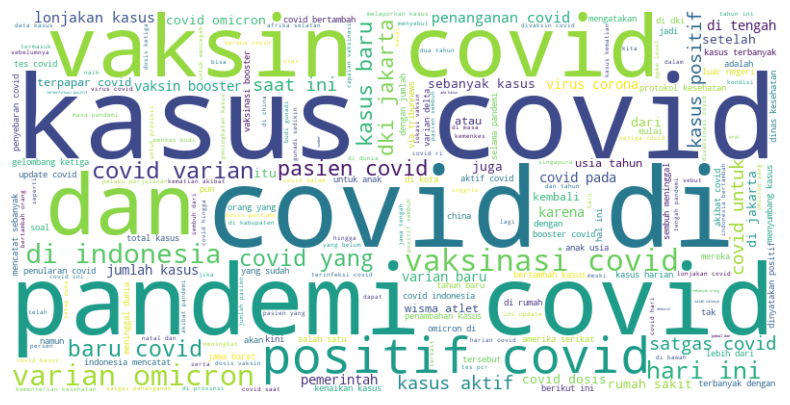

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# LIST STOPWORD

In [16]:
stop_factory = StopWordRemoverFactory()
more_stopword = ["dengan", "ia","bahwa","oleh"]
sastrawi_stopwords = set(stop_factory.get_stop_words()+more_stopword)
stopword = stop_factory.create_stop_word_remover()
print(len(sastrawi_stopwords))
print(sastrawi_stopwords)

809
{'sebaiknya', 'antaranya', 'apabila', 'diakhirinya', 'sekurang-kurangnya', 'setibanya', 'lewat', 'kata', 'seolah', 'umumnya', 'bukankah', 'antar', 'bolehlah', 'diperlukan', 'tiap', 'w', 'menaiki', 'menunjukkan', 'kami', 'kemungkinannya', 'merekalah', 'berikutnya', 'terakhir', 'betul', 'sebut', 'lamanya', 'para', 'sekaranglah', 'menggunakan', 'panjang', 'akhirnya', 'mengingat', 'sini', 'ibaratkan', 'mulanya', 'bagaimanakah', 'memisalkan', 'digunakan', 'mengetahui', 'dipastikan', 'inilah', 'mulailah', 'terasa', 'mengerjakan', 'selamanya', 'terbanyak', 'maksud', 'paling', 'cukup', 'sebetulnya', 'kamu', 'terlihat', 'jadilah', 'bilakah', 'melakukan', 'seseorang', 'k', 'pernah', 'dua', 'tersebutlah', 'juga', 'yakni', 'teringat', 'mendapat', 'terjadi', 'awalnya', 'tentang', 'malah', 'menegaskan', 'hendak', 'itu', 'keinginan', 'mau', 'pada', 'soal', 'demi', 'mengibaratkannya', 'akhiri', 'seketika', 'hadap', 'mata', 'maupun', 'ditandaskan', 'meski', 'macam', 'semasih', 'apa', 'cuma', 'ditan

In [17]:
nltk_stopwords = set(stopwords.words('indonesian'))
print(len(nltk_stopwords))
print(nltk_stopwords)

757
{'sebaiknya', 'antaranya', 'apabila', 'diakhirinya', 'sekurang-kurangnya', 'setibanya', 'lewat', 'kata', 'seolah', 'umumnya', 'bukankah', 'antar', 'bolehlah', 'diperlukan', 'tiap', 'menaiki', 'menunjukkan', 'kami', 'kemungkinannya', 'merekalah', 'berikutnya', 'terakhir', 'betul', 'sebut', 'lamanya', 'para', 'menggunakan', 'panjang', 'akhirnya', 'mengingat', 'sini', 'ibaratkan', 'mulanya', 'bagaimanakah', 'memisalkan', 'digunakan', 'mengetahui', 'dipastikan', 'inilah', 'mulailah', 'terasa', 'mengerjakan', 'selamanya', 'terbanyak', 'paling', 'cukup', 'sebetulnya', 'kamu', 'terlihat', 'jadilah', 'bilakah', 'melakukan', 'seseorang', 'pernah', 'dua', 'tersebutlah', 'juga', 'yakni', 'teringat', 'mendapat', 'terjadi', 'awalnya', 'tentang', 'malah', 'menegaskan', 'hendak', 'itu', 'keinginan', 'mau', 'pada', 'soal', 'demi', 'mengibaratkannya', 'akhiri', 'seketika', 'maupun', 'ditandaskan', 'meski', 'macam', 'semasih', 'apa', 'cuma', 'ditanyakan', 'justru', 'kelamaan', 'menyiapkan', 'menanya

# Combine stopword nltk and sastrawi + custom stopword

In [18]:
custom_stopwords = {'via', 'tiga', 'tingkat', 'tahun', 'selengkapnya', 'tribunnews', 'tvone', 'saksikan', 'live', 'streaming', 'bikin', 'sumber', 'pekan', 'sepekan'}
words_to_exclude = {'kasus','jumlahnya', 'jumlah', 'berjumlah', 'masalah', 'akhir', 'berakhir', 'berakhirnya', 'meangakhiri', 'terakhir', 
                    'diakhiri', 'masalahnya', 'bulan', 'awal', 'hari', 'gunakan', 'menggunakan', 'siap', 'mulai', 'dimulai',
                    'dimulainya', 'memulai', 'cukup','asal', 'banyak', 'sebanyak', 'terbanyak', 'mengatakan', 
                    'sedikit', 'termasuk', 'naik', 'baru', 'jangan', 'tambah'}
indonesian_stopwords = nltk_stopwords | sastrawi_stopwords | custom_stopwords
indonesian_stopwords -= words_to_exclude
print(len(indonesian_stopwords))
print(indonesian_stopwords)

794
{'sebaiknya', 'antaranya', 'apabila', 'diakhirinya', 'sekurang-kurangnya', 'setibanya', 'lewat', 'kata', 'seolah', 'umumnya', 'bukankah', 'bolehlah', 'antar', 'diperlukan', 'w', 'tiap', 'menaiki', 'menunjukkan', 'kami', 'merekalah', 'kemungkinannya', 'berikutnya', 'betul', 'sebut', 'lamanya', 'para', 'sekaranglah', 'sini', 'akhirnya', 'mengingat', 'panjang', 'ibaratkan', 'mulanya', 'bagaimanakah', 'memisalkan', 'digunakan', 'mengetahui', 'dipastikan', 'inilah', 'mulailah', 'terasa', 'mengerjakan', 'selamanya', 'maksud', 'paling', 'sebetulnya', 'kamu', 'terlihat', 'jadilah', 'bilakah', 'melakukan', 'seseorang', 'pernah', 'k', 'dua', 'tersebutlah', 'juga', 'yakni', 'teringat', 'mendapat', 'terjadi', 'tvone', 'awalnya', 'tentang', 'malah', 'menegaskan', 'hendak', 'itu', 'keinginan', 'mau', 'soal', 'pada', 'demi', 'mengibaratkannya', 'akhiri', 'seketika', 'hadap', 'maupun', 'mata', 'ditandaskan', 'meski', 'macam', 'semasih', 'apa', 'ditanyakan', 'cuma', 'justru', 'menyiapkan', 'tuju', 

# Stopword removal with nltk

In [19]:
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in indonesian_stopwords]
    return filtered_tokens

In [20]:
df_clean['filtered_tokens'] = df_clean['tokenized_tweets'].apply(remove_stopwords)

In [21]:
df_clean.head(11400).tail(10)

,clean_tweets,tokenized_tweets,filtered_tokens
11390,bupati jayapura soroti kasus covid dalam pon xx protokol kesehatan harus jadi kewajiban via tribunnews,"[bupati, jayapura, soroti, kasus, covid, dalam, pon, xx, protokol, kesehatan, harus, jadi, kewajiban, via, tribunnews]","[bupati, jayapura, soroti, kasus, covid, pon, xx, protokol, kesehatan, kewajiban]"
11391,anies baswedan menyebut dki nol kasus kematian covid per kemarin namun hal itu tak membebaskan jakarta dan ri dari risiko gelombang ini catatan pakar,"[anies, baswedan, menyebut, dki, nol, kasus, kematian, covid, per, kemarin, namun, hal, itu, tak, membebaskan, jakarta, dan, ri, dari, risiko, gelombang, ini, catatan, pakar]","[anies, baswedan, menyebut, dki, nol, kasus, kematian, covid, kemarin, membebaskan, jakarta, ri, risiko, gelombang, catatan, pakar]"
11392,pasien rsd wisma atlet sembuh dari covid capai orang,"[pasien, rsd, wisma, atlet, sembuh, dari, covid, capai, orang]","[pasien, rsd, wisma, atlet, sembuh, covid, capai]"
11393,sebagian orang mengalami long covid usai sembuh dari covid mereka bercerita tak bisa bekerja seperti biasa dan terus mengalami gejala yang menyakitkan,"[sebagian, orang, mengalami, long, covid, usai, sembuh, dari, covid, mereka, bercerita, tak, bisa, bekerja, seperti, biasa, dan, terus, mengalami, gejala, yang, menyakitkan]","[mengalami, long, covid, sembuh, covid, bercerita, mengalami, gejala, menyakitkan]"
11394,berikut ini update data kasus covid untuk provinsi di kalteng kaltim kaltara gorontalo sulbar sulsel dan sultra,"[berikut, ini, update, data, kasus, covid, untuk, provinsi, di, kalteng, kaltim, kaltara, gorontalo, sulbar, sulsel, dan, sultra]","[update, data, kasus, covid, provinsi, kalteng, kaltim, kaltara, gorontalo, sulbar, sulsel, sultra]"
11395,satgas covid mengklaim kemampuan ri hadapi lonjakan kasus covid kedua layak bersanding dengan jepang dan vietnam seperti apa perbandingannya,"[satgas, covid, mengklaim, kemampuan, ri, hadapi, lonjakan, kasus, covid, kedua, layak, bersanding, dengan, jepang, dan, vietnam, seperti, apa, perbandingannya]","[satgas, covid, mengklaim, kemampuan, ri, hadapi, lonjakan, kasus, covid, layak, bersanding, jepang, vietnam, perbandingannya]"
11396,bupati jayapura pon xx papua harus sukses satu indikatornya tak boleh ada kasus covid di venue,"[bupati, jayapura, pon, xx, papua, harus, sukses, satu, indikatornya, tak, boleh, ada, kasus, covid, di, venue]","[bupati, jayapura, pon, xx, papua, sukses, indikatornya, kasus, covid, venue]"
11397,jumlah kasus aktif covid di indonesia pada jumat tercatat ada orang jumlah itu didapatkan setelah terjadi penurunan sebesar kasus dari hari sebelumnya,"[jumlah, kasus, aktif, covid, di, indonesia, pada, jumat, tercatat, ada, orang, jumlah, itu, didapatkan, setelah, terjadi, penurunan, sebesar, kasus, dari, hari, sebelumnya]","[jumlah, kasus, aktif, covid, indonesia, jumat, tercatat, jumlah, didapatkan, penurunan, kasus, hari]"
11398,berikut ini update data kasus covid untuk provinsi sulteng sultra maluku malut papua dan papua barat,"[berikut, ini, update, data, kasus, covid, untuk, provinsi, sulteng, sultra, maluku, malut, papua, dan, papua, barat]","[update, data, kasus, covid, provinsi, sulteng, sultra, maluku, malut, papua, papua, barat]"
11399,spesimen yang diperiksa dalam sehari diambil dari orang total sudah spesimen diperiksa yang diambil dari orang,"[spesimen, yang, diperiksa, dalam, sehari, diambil, dari, orang, total, sudah, spesimen, diperiksa, yang, diambil, dari, orang]","[spesimen, diperiksa, sehari, diambil, total, spesimen, diperiksa, diambil]"


# Stemming with sastrawi

In [22]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [23]:
sentence = 'kebal'
output   = stemmer.stem(sentence)

print(output)
# ekonomi indonesia sedang dalam tumbuh yang bangga

print(stemmer.stem('menropi'))
# mereka tiru

kebal
menropi


In [24]:
exclude_stem = ['kesehatan', 'ketiga', 'pemain', 'bermain', 'perjalanan', 'membaik', 'terkait', 'mengaku', 'mengakui', 'akui', 'mengatakan', 'pemerintah', 'diberlakukan', 'pemberlakuan', 'lakukan', 'memberlakukan', 'pelaku', 'berlaku', 'berjalan', 'bali', 'menjalankan', 'penanganan', 'menangani', 'tangani', 'meningkatkan', 'ditangani', 'meningkat', 'tingkatkan', 'peningkatan', 'tingkatan', 'meninggal', 'berlaku', 'melakukan', 'dilakukan', 'dinyatakan', 'menyatakan']
def apply_stemming(tokens):
    stemmed_tokens = [word if word in exclude_stem else stemmer.stem(word) for word in tokens]
    return stemmed_tokens

In [25]:
df_clean['stemmed_text'] = df_clean['filtered_tokens'].apply(apply_stemming)

In [26]:
df_clean.head(1234).tail(15)

,clean_tweets,tokenized_tweets,filtered_tokens,stemmed_text
1219,penambahan itu berdasarkan pemeriksaan terhadap spesimen,"[penambahan, itu, berdasarkan, pemeriksaan, terhadap, spesimen]","[penambahan, berdasarkan, pemeriksaan, spesimen]","[tambah, dasar, periksa, spesimen]"
1220,sebanyak lansia telah menerima vaksin dosis pertama jumlah itu sama dengan persen dari target,"[sebanyak, lansia, telah, menerima, vaksin, dosis, pertama, jumlah, itu, sama, dengan, persen, dari, target]","[sebanyak, lansia, menerima, vaksin, dosis, jumlah, persen, target]","[banyak, lansia, terima, vaksin, dosis, jumlah, persen, target]"
1221,pandemi covid menciptakan peluang baru untuk adopsi infrastruktur digital dalam perdagangan dan tata kelola,"[pandemi, covid, menciptakan, peluang, baru, untuk, adopsi, infrastruktur, digital, dalam, perdagangan, dan, tata, kelola]","[pandemi, covid, menciptakan, peluang, baru, adopsi, infrastruktur, digital, perdagangan, tata, kelola]","[pandemi, covid, cipta, peluang, baru, adopsi, infrastruktur, digital, dagang, tata, kelola]"
1222,menurut lestari pandemi covid krisis politik di eropa timur dan turbulensi geopolitik global patut menjadi pelajaran dalam menata perekonomian,"[menurut, lestari, pandemi, covid, krisis, politik, di, eropa, timur, dan, turbulensi, geopolitik, global, patut, menjadi, pelajaran, dalam, menata, perekonomian]","[lestari, pandemi, covid, krisis, politik, eropa, timur, turbulensi, geopolitik, global, patut, pelajaran, menata, perekonomian]","[lestari, pandemi, covid, krisis, politik, eropa, timur, turbulensi, geopolitik, global, patut, ajar, tata, ekonomi]"
1223,sejumlah institusi negara menyerahkan arsip mengenai penanganan covid ke anri selain sebagai tanggung jawab institusi sesuai uu kearsipan arsip ini juga berguna sebagai referensi sejarah,"[sejumlah, institusi, negara, menyerahkan, arsip, mengenai, penanganan, covid, ke, anri, selain, sebagai, tanggung, jawab, institusi, sesuai, uu, kearsipan, arsip, ini, juga, berguna, sebagai, referensi, sejarah]","[institusi, negara, menyerahkan, arsip, penanganan, covid, anri, tanggung, institusi, sesuai, uu, kearsipan, arsip, berguna, referensi, sejarah]","[institusi, negara, serah, arsip, penanganan, covid, anri, tanggung, institusi, sesuai, uu, arsip, arsip, guna, referensi, sejarah]"
1224,indonesia mencatat sebanyak kasus baru covid rabu dki jakarta menyumbang kasus terbanyak dengan jumlah,"[indonesia, mencatat, sebanyak, kasus, baru, covid, rabu, dki, jakarta, menyumbang, kasus, terbanyak, dengan, jumlah]","[indonesia, mencatat, sebanyak, kasus, baru, covid, rabu, dki, jakarta, menyumbang, kasus, terbanyak, jumlah]","[indonesia, catat, banyak, kasus, baru, covid, rabu, dki, jakarta, sumbang, kasus, banyak, jumlah]"
1225,benarkah vaksin covid munculkan cacing parasit di mata yuk cek fakta di sini,"[benarkah, vaksin, covid, munculkan, cacing, parasit, di, mata, yuk, cek, fakta, di, sini]","[vaksin, covid, munculkan, cacing, parasit, yuk, cek, fakta]","[vaksin, covid, muncul, cacing, parasit, yuk, cek, fakta]"
1226,kota pekalongan jawa tengah saat ini mencatat nol kasus aktif covid satu pasien tersisa pada akhir tahun sudah sembuh hingga tidak lagi ditemukan warga terkonfirmasi dan suspect,"[kota, pekalongan, jawa, tengah, saat, ini, mencatat, nol, kasus, aktif, covid, satu, pasien, tersisa, pada, akhir, tahun, sudah, sembuh, hingga, tidak, lagi, ditemukan, warga, terkonfirmasi, dan, suspect]","[kota, pekalongan, jawa, mencatat, nol, kasus, aktif, covid, pasien, tersisa, akhir, sembuh, ditemukan, warga, terkonfirmasi, suspect]","[kota, kalong, jawa, catat, nol, kasus, aktif, covid, pasien, sisa, akhir, sembuh, temu, warga, konfirmasi, suspect]"
1227,setelah dicabutnya pemberlakuan pembatasan kegiatan masyarakat ppkm permintaan layanan tes usap antigen dan pcr covid menurun,"[setelah, dicabutnya, pemberlakuan, pembatasan, kegiatan, masyarakat, ppkm, permintaan, layanan, tes, usap, antigen, dan, pcr, covid, menurun]","[dicabutnya, pemberlakuan

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36711 entries, 0 to 36710
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   clean_tweets      36711 non-null  object
 1   tokenized_tweets  36711 non-null  object
 2   filtered_tokens   36711 non-null  object
 3   stemmed_text      36711 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [28]:
text_for_wordcloud2 = ' '.join([word for tokens in df_clean['stemmed_text'] for word in tokens])

In [29]:
print(text_for_wordcloud2[:3000])

bukti gambar klaim beku darah vaksinasi covid keliru klaim vaksin covid bas mrna adenoviral turun sistem kebal tubuh kemenkes tonton konser coldplay booster vaksin covid jadwal lokasi vaksin covid surabaya hari mei jadwal lokasi vaksin covid surabaya hari mei simpel sakit buktibuktinya terang dokter terang kuasa hukum lapor who cabut status darurat covid kemenkes ri tekan cabut status indonesia tunggu hasil koordinasi menteri who cabut status darurat covid global status darurat ri cabut nasib vaksin covid buat negeri indovac pandemi covid gap jarak daya kompetensi generasi butuh usaha status darurat covid akhir ahli anjur pakai masker klinik jadwal lokasi vaksin covid surabaya hari mei jadwal lokasi vaksin covid surabaya hari mei who rekomendasi vaksinasi covid baru target varian xbb xbb jumlah kasus covid hari provinsi aceh sumut sumbar riau kepri jambi bengkulu dakwa tipu korban ksp indosurya natalia rusli eks klien verawati sanjaya surat terang sembuh covid verawati bantah palsu sur

In [30]:
wordcloud2 = WordCloud(width=800, height=400, max_font_size=150, background_color='white').generate(text_for_wordcloud2)

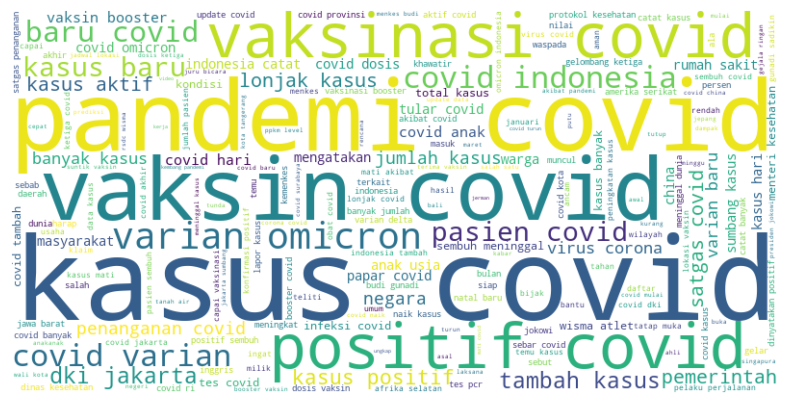

In [31]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_hd_nodup.png', dpi=300)
plt.show()

In [32]:
#df_clean.to_csv("../dataset/dup_preprocessed_covid4.csv", encoding="utf-8", index=False)